<a href="https://colab.research.google.com/github/JeromeMberia/Unreal/blob/main/Real_Estate_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

> Should a potential investor invest in 3 bedrooms or 4 bedrooms?

# Dataset

# Import liberies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset

In [ ]:
df = pd.read_csv('kc_house_data.csv')

# Checking the Data

In [ ]:
# Determining number of records in the dataset
rows = df.shape[0]
columns = df.shape[1]
print(f'{rows} rows \n {columns} columns')

21613 rows 
 21 columns


In [ ]:
#Previewing the head of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Previewing the tail of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Checking whether each column has an appropriate datatype
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
#Checking for Unique Values
df.nunique()

id               21436
date               372
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
# Checking the columns in the dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Data Cleaning

In [ ]:
#Checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Checking for Duplicates
df.duplicated().sum().any()

False

In [ ]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Changing the values of date column
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [ ]:
df['bathrooms'] = df.bathrooms.astype(int)

In [ ]:
df['bathrooms'].value_counts()

2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

In [ ]:
df['floors'] = df.floors.astype(int)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.to_csv('unreal.csv')

# Exploratory Data Analysis

## Univariate

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

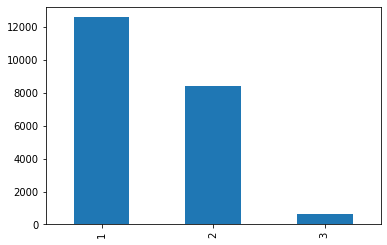

In [ ]:
df['floors'].value_counts().plot(kind='bar')

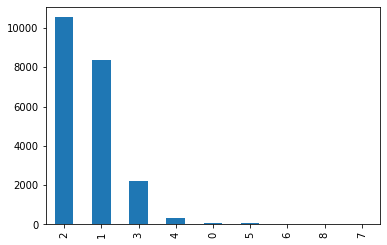

In [ ]:
df['bathrooms'].value_counts().plot(kind='bar')

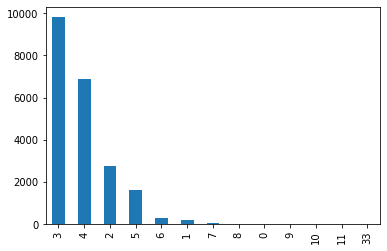

In [ ]:
df['bedrooms'].value_counts().plot(kind='bar')

In [ ]:
df['price'].mean()

540088.1417665294

In [ ]:
df['bedrooms'].mode()[0]

3

In [ ]:
df['bathrooms'].mode()[0]

2

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


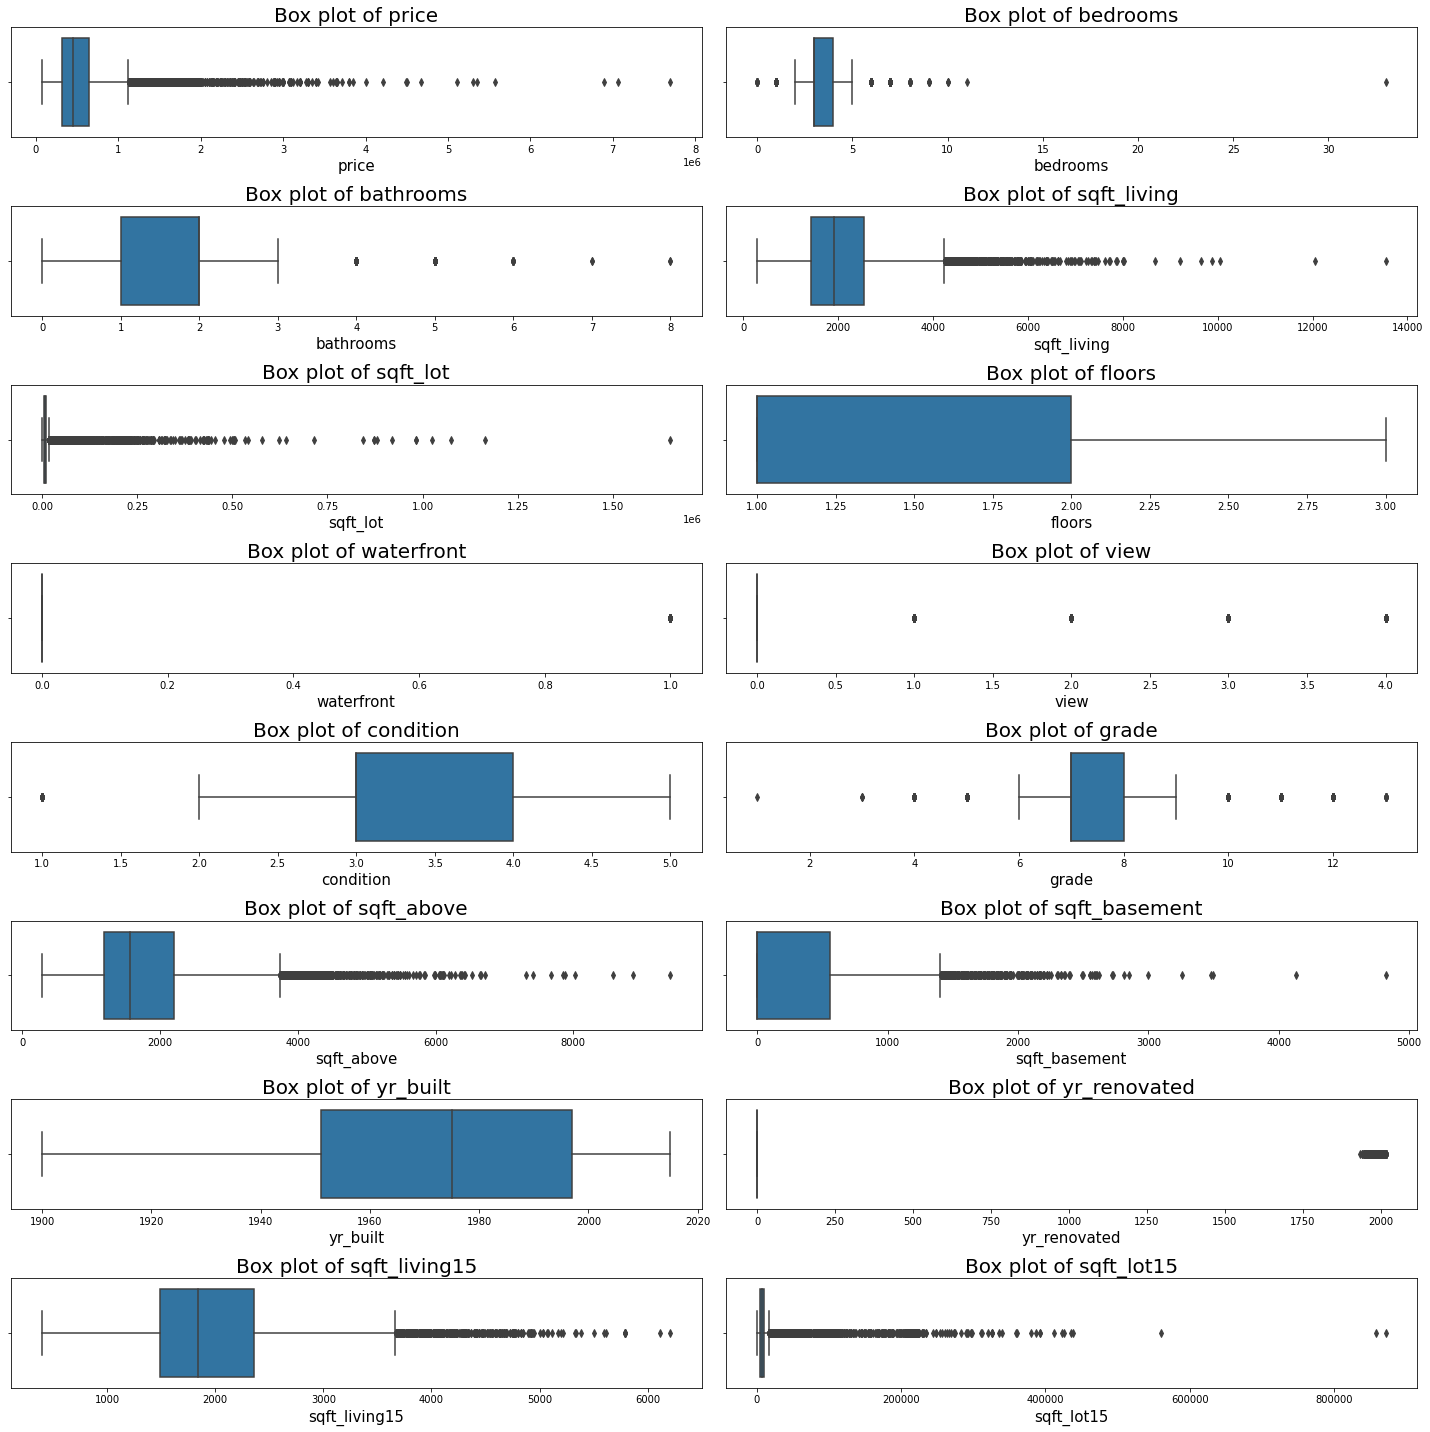

In [ ]:
df_1 = df.drop(['id', 'date', 'lat', 'long', 'zipcode'], axis=1)

names = list(df_1.columns)
fig, axes = plt.subplots(8,2, figsize=(20,20) )  

y = 0
for name in names:
  i, j = divmod(y, 2)
  sns.boxplot(x=df[name], ax=axes[i, j])
  axes[i, j].set_title(f'Box plot of {name}', fontsize=20)
  axes[i, j].set_xlabel(name, fontsize=15)
  y+=1

plt.tight_layout()
plt.show()

## Bivariate

##Multivariate Analysis

Factor Analysis

In [ ]:
df_2 = df.drop(['price','id', 'date', 'lat', 'long', 'zipcode', 'yr_built', 'yr_renovated'], axis=1)
df_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,1340,5650
1,3,2,2570,7242,2,0,0,3,7,2170,400,1690,7639
2,2,1,770,10000,1,0,0,3,6,770,0,2720,8062
3,4,3,1960,5000,1,0,0,5,7,1050,910,1360,5000
4,3,2,1680,8080,1,0,0,3,8,1680,0,1800,7503


In [ ]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3


from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df_2)
chi_square_value, p_value

/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df_2)
kmo_all,kmo_model

(                    KMO
 bedrooms       0.954825
 bathrooms      0.939169
 sqft_living    0.616468
 sqft_lot       0.557569
 floors         0.850867
 waterfront     0.570866
 view           0.753195
 condition      0.826028
 grade          0.940885
 sqft_above     0.592974
 sqft_basement  0.226282
 sqft_living15  0.948954
 sqft_lot15     0.563419, 0.6930768144625117)

In [ ]:
#import factor_analyzer as FactorAnalyzer
from factor_analyzer import FactorAnalyzer
# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df_2, 13, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,4.669250e+00
1,1.739761e+00
2,1.645115e+00
3,1.260459e+00
4,8.135296e-01
5,6.755357e-01
6,5.974337e-01
7,5.086238e-01
8,3.282163e-01
9,2.853646e-01


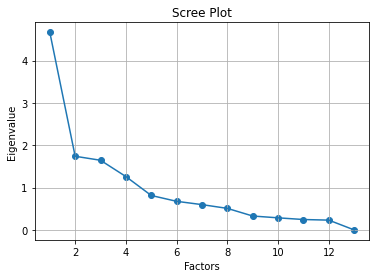

In [ ]:
# Creating a scree plot using matplotlib
#
plt.scatter(range(1,df_2.shape[1]+1),ev)
plt.plot(range(1,df_2.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Step 12: Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df_2, 4, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4
bedrooms,0.589453,-0.020589,0.167928,-0.061206
bathrooms,0.739459,0.006358,-0.097965,0.063594
sqft_living,0.980685,0.113703,0.100802,0.123492
sqft_lot,0.081788,0.782898,0.006243,0.029148
floors,0.432191,-0.061839,-0.563137,0.019978
waterfront,0.032721,0.012797,0.008609,0.450977
view,0.172557,0.038209,0.123894,0.862871
condition,-0.096408,0.006365,0.335845,0.019041
grade,0.785572,0.060010,-0.212299,0.174113
sqft_above,0.857864,0.151334,-0.368407,0.066020


In [ ]:
# Step 14: Getting variance of each factors
# 
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4
SS Loadings,4.114678,1.489992,1.194290,1.064219
Proportion Var,0.316514,0.114615,0.091868,0.081863
Cumulative Var,0.316514,0.431128,0.522997,0.604860


# Hypothesis testing